Linear regression is one of the most fundamental and widely used algorithms in machine learning. It is used to model the relationship between a dependent variable (target) and one or more independent variables (features).



Linear regression aims to find the best-fitting straight line (or hyperplane in higher dimensions) that minimizes the error between the predicted values and the actual values.

Simple Linear Regression: y=mx+c

Multiple Linear Regression: 𝑦=𝛽0+𝛽1𝑥1+𝛽2𝑥2+...+𝛽𝑛𝑥𝑛

Where: 
- y is the dependent variable (target)
    - 𝑥1,𝑥2,... are the independent variables (features)
    - 𝛽0 is the intercept
    - 𝛽1,𝛽2,... are the coefficients (weights)





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
# Generate sample data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Feature
y = 4 + 3 * X + np.random.randn(100, 1)  # Target with noise

# Convert to DataFrame for easier visualization
df = pd.DataFrame(np.hstack((X, y)), columns=["Feature", "Target"])
df.head(10)

,Feature,Target
0,0.749080,6.334288
1,1.901429,9.405278
2,1.463988,8.483724
3,1.197317,5.604382
4,0.312037,4.716440
5,0.311989,5.293080
6,0.116167,5.826396
7,1.732352,8.678787
8,1.202230,6.798196
9,1.416145,7.746678


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [5]:
print(model.intercept_)
print(model.coef_)

[4.14291332]
[[2.79932366]]


y = mx + c
y = 2.79 * X + 4.14


In [7]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
# print(f"Intercept: {model.intercept_[0]:.2f}")
# print(f"Coefficient: {model.coef_[0][0]:.2f}")

Mean Squared Error: 0.65
R² Score: 0.81


**MSE**: Measures the average squared difference between actual and predicted values.

Small MSE → Predictions are close to actual values (good model).

Large MSE → Predictions have large errors (bad model).

**R²** measures how much of the variance in the target variable is explained by the model

1 → Perfect fit (model explains all variance)

0 → Model does not explain any variance (as bad as predicting the mean)

Higher R² means a better model

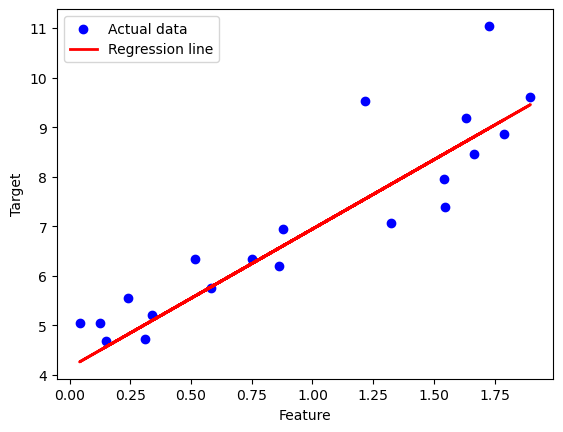

In [11]:
plt.scatter(X_test, y_test, color="blue", label="Actual data")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regression line")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

fitting a linear regression means finding the intercept and coefficients (also called weights or parameters). These values define the best-fitting line that minimizes the error between the predicted values and the actual values.

y= a + bx

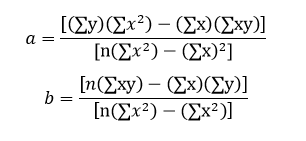

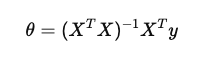

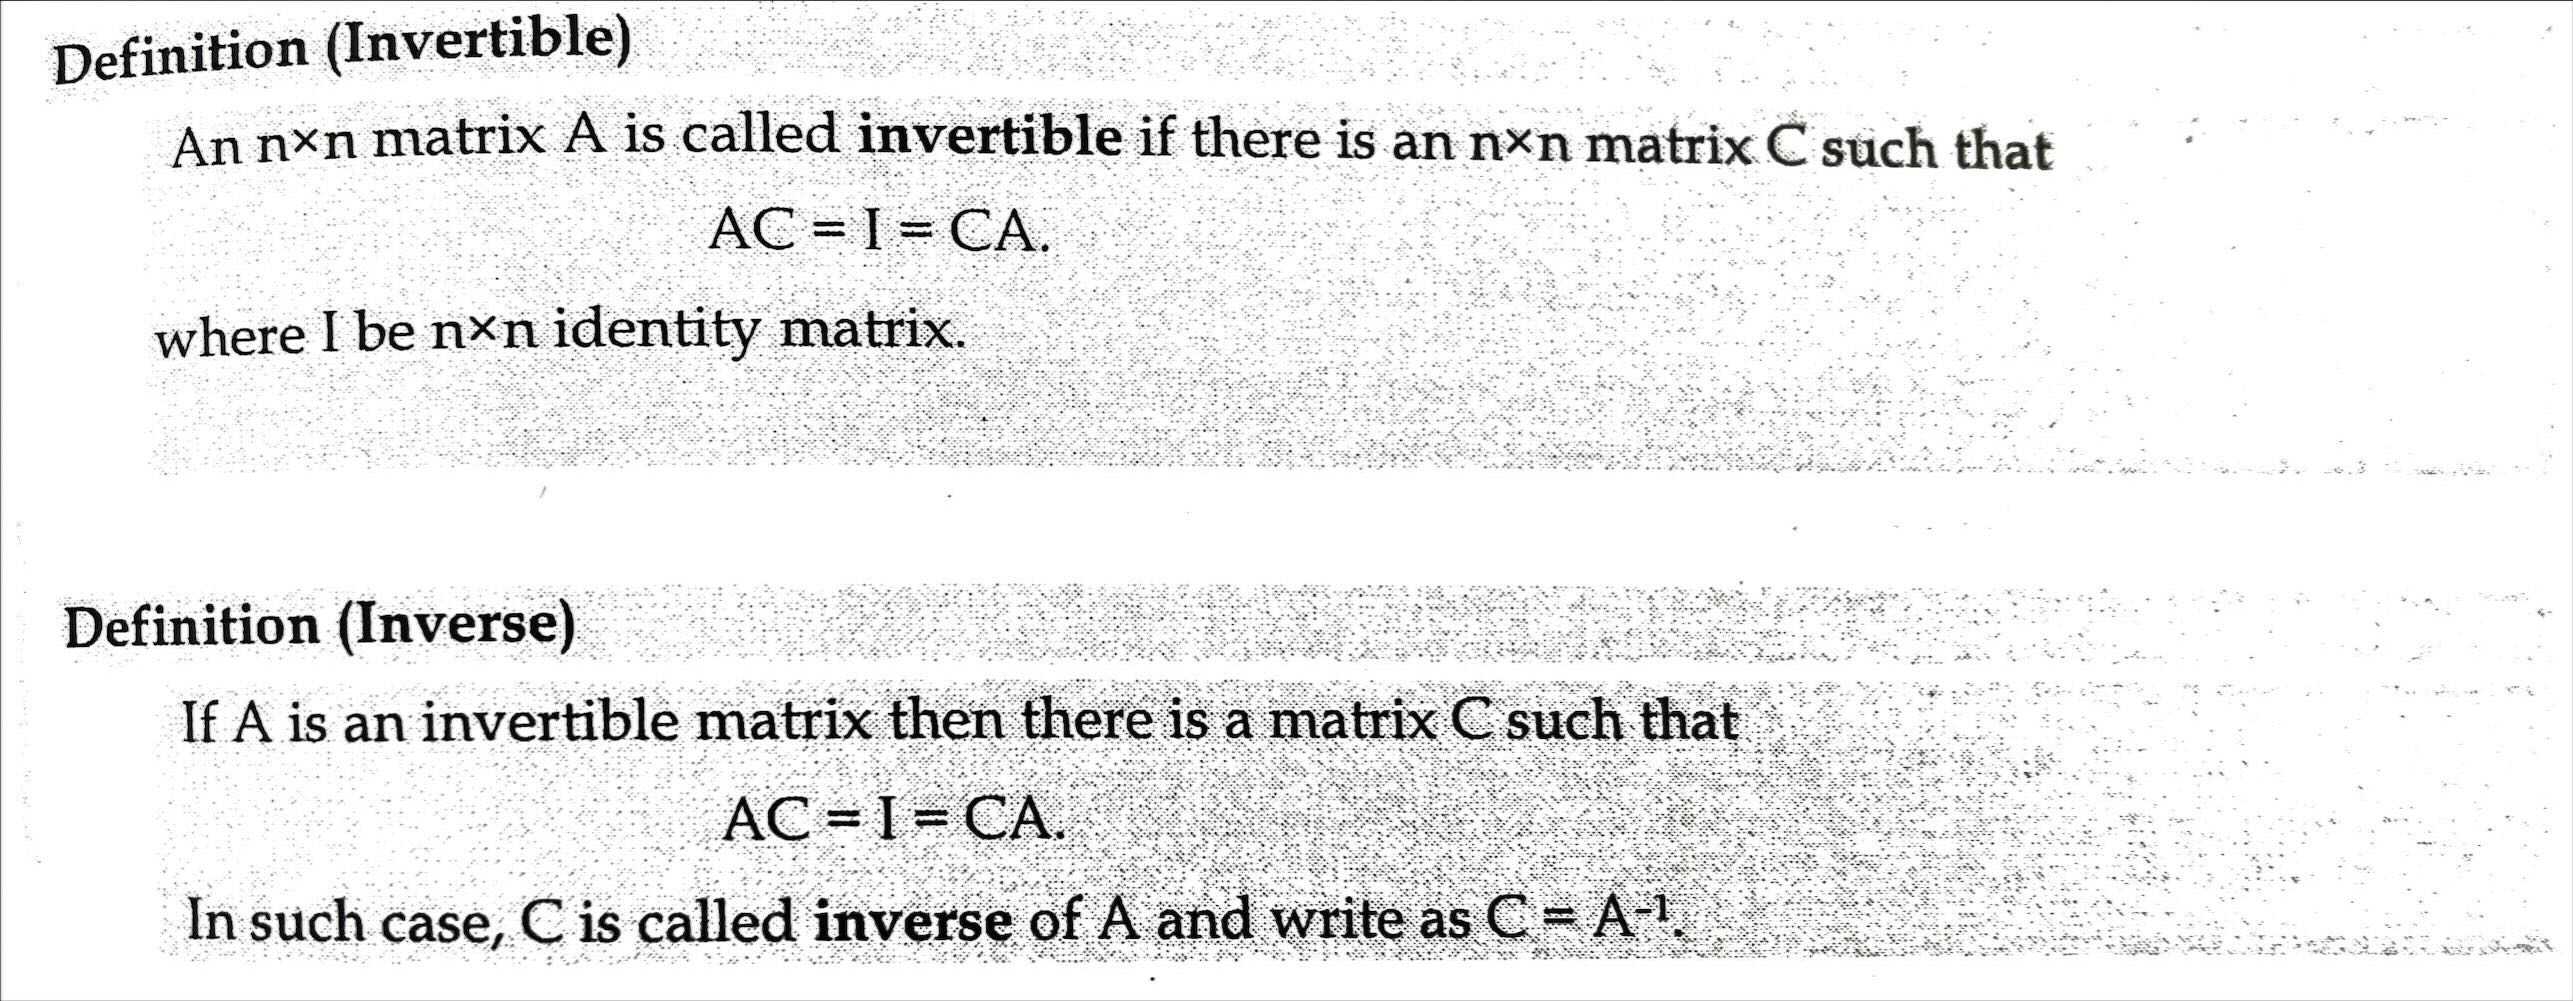

inverse of A = adj of A / det of A

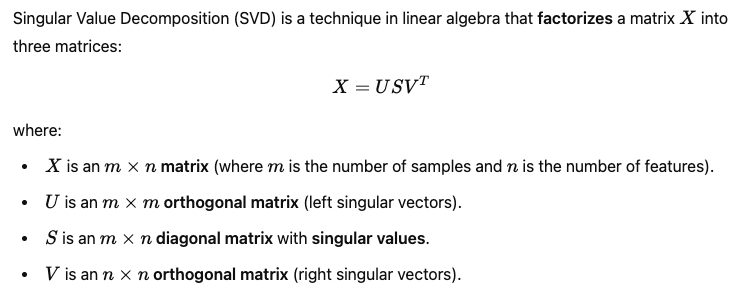

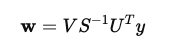

The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper

In [12]:
import seaborn as sns
import pandas as pd

In [13]:
df = pd.read_csv("/Users/gaganpuri/Documents/Broadway/datasets/Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [14]:
df.shape

(200, 5)

In [15]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [16]:
df.duplicated().sum()


0

In [17]:
df.describe()


,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [19]:
df.drop(df.columns[[0]], axis=1, inplace=True) 


In [20]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


Exploratory Data Analysis


<Axes: xlabel='sales', ylabel='Count'>

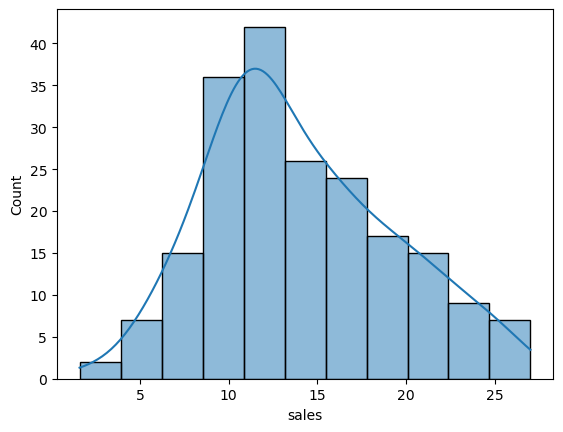

In [21]:
sns.histplot(df.sales, kde=True)


/var/folders/q1/1hc_zrdd33v7289_d_t0248w0000gn/T/ipykernel_64379/122058598.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["newspaper"])


<Axes: xlabel='newspaper', ylabel='Density'>

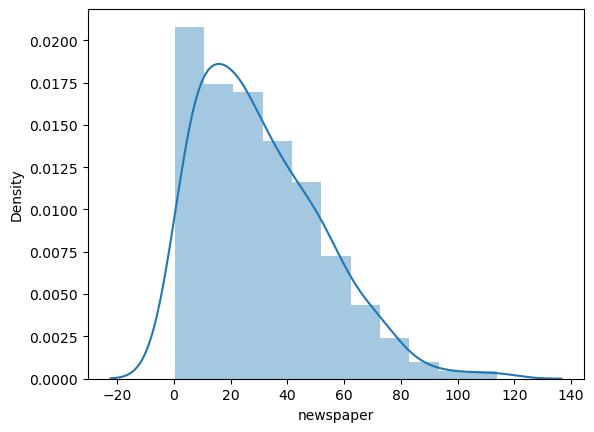

In [22]:
sns.distplot(df["newspaper"])


/var/folders/q1/1hc_zrdd33v7289_d_t0248w0000gn/T/ipykernel_23400/2550790215.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.radio)


<Axes: xlabel='radio', ylabel='Density'>

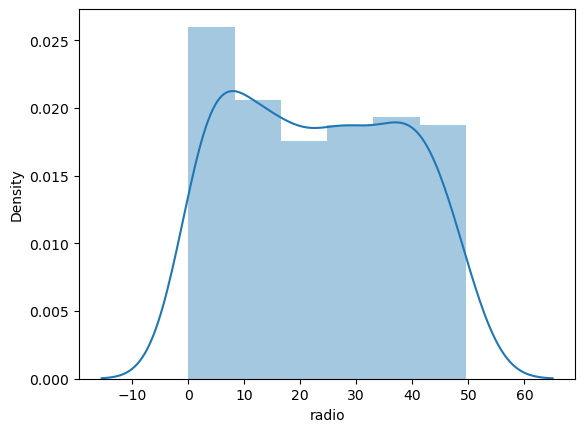

In [21]:
sns.distplot(df.radio)


Exploring Relationships between Predictors and Response


In [23]:
df.TV.corr(df.sales)


0.7822244248616066

In [24]:
df.corr()


,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

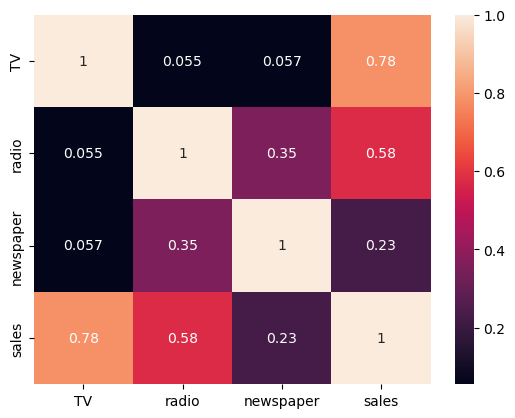

In [12]:
sns.heatmap(df.corr(),annot=True)


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# create X and y
feature_cols = ['TV', 'radio', 'newspaper']
X = df[feature_cols]
y = df.sales

# instantiate and fit
lm1 = LinearRegression() #model 1m1 refer to first model
lm1.fit(X, y)

# print the coefficients
print(lm1.intercept_)
print(lm1.coef_)

2.9388893694593996
[ 0.04576465  0.18853002 -0.00103749]


In [ ]:
# pair the feature names with the coefficients
list(zip(feature_cols, lm1.coef_))

In [ ]:
lm1_preds = lm1.predict(X[['TV', 'radio', 'newspaper']])


In [30]:
print("R^2: ", r2_score(y, lm1_preds))
print("MSE: ", mean_squared_error(y, lm1_preds))

R^2:  0.8972106381789522


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# create X and y
feature_cols = ['TV', 'radio']
X = df[feature_cols]
y = df.sales

# instantiate and fit
lm1 = LinearRegression() #model 1m1 refer to first model
lm1.fit(X, y)

# print the coefficients
print(lm1.intercept_)
print(lm1.coef_)

2.9210999124051327
[0.04575482 0.18799423]


In [25]:
lm1_preds = lm1.predict(X[['TV', 'radio']])


In [26]:
print("R^2: ", r2_score(y, lm1_preds))


R^2:  0.8971942610828957


In [30]:
sample = [[0.9, 0.5]]

lm1_pred = lm1.predict(sample)
print("Projection of sales for the given samples on tv and radio is: ", lm1_pred[0])

Projection of sales for the given samples on tv and radio is:  3.056276359306256


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
